# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [2]:
data = pd.read_csv('Data/laptopData_cleaned.csv')

# EDA

## Overview

In [3]:
print(data.shape)
print(data.columns)
data.head()

(1271, 17)
Index(['Company', 'TypeName', 'Inches', 'RAM_GB', 'GPU', 'OpSys', 'Weight_KG',
       'Price_Rupee', 'CPU_model', 'CPU_GHz', 'ScreenRes_width',
       'ScreenRes_height', 'TouchScreen', 'Memory_Size1_GB', 'Memory_Type1',
       'Memory_Size2_GB', 'Memory_Type2'],
      dtype='object')


,Company,TypeName,Inches,RAM_GB,GPU,OpSys,Weight_KG,Price_Rupee,CPU_model,CPU_GHz,ScreenRes_width,ScreenRes_height,TouchScreen,Memory_Size1_GB,Memory_Type1,Memory_Size2_GB,Memory_Type2
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5,2.3,2560,1600,No,128,SSD,0,No second memory
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5,1.8,1440,900,No,128,Flash Storage,0,No second memory
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5 7200U,2.5,1920,1080,No,256,SSD,0,No second memory
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7,2.7,2880,1800,No,512,SSD,0,No second memory
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5,3.1,2560,1600,No,256,SSD,0,No second memory


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1271 entries, 0 to 1270
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1271 non-null   object 
 1   TypeName          1271 non-null   object 
 2   Inches            1271 non-null   float64
 3   RAM_GB            1271 non-null   int64  
 4   GPU               1271 non-null   object 
 5   OpSys             1271 non-null   object 
 6   Weight_KG         1271 non-null   float64
 7   Price_Rupee       1271 non-null   float64
 8   CPU_model         1271 non-null   object 
 9   CPU_GHz           1271 non-null   float64
 10  ScreenRes_width   1271 non-null   int64  
 11  ScreenRes_height  1271 non-null   int64  
 12  TouchScreen       1271 non-null   object 
 13  Memory_Size1_GB   1271 non-null   int64  
 14  Memory_Type1      1271 non-null   object 
 15  Memory_Size2_GB   1271 non-null   int64  
 16  Memory_Type2      1271 non-null   object 


# Some Distributions of numerical features

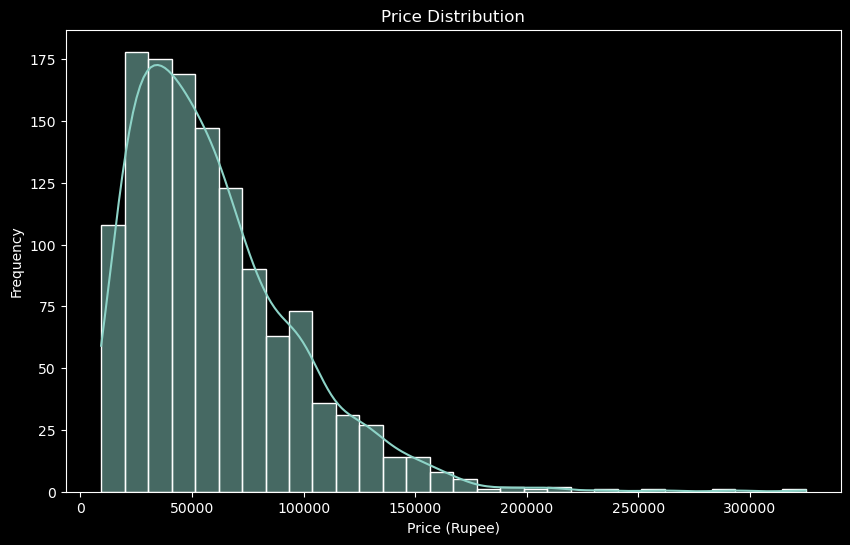

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Price_Rupee'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price (Rupee)')
plt.ylabel('Frequency')
# plt.yscale('log')
plt.show()

<Figure size 1000x600 with 0 Axes>

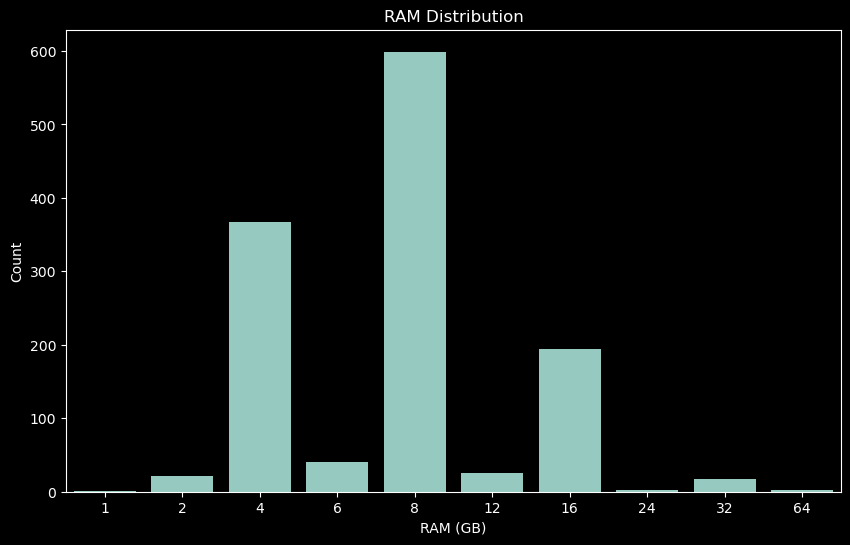

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='RAM_GB', data=data)
plt.title('RAM Distribution')
plt.xlabel('RAM (GB)')
plt.ylabel('Count')
plt.show()

## Some categorial feature analysis

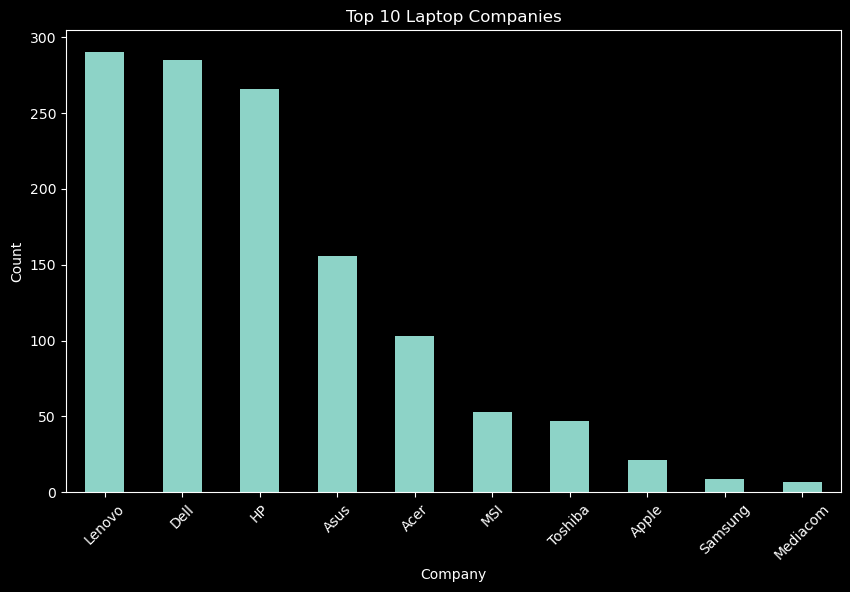

In [10]:
plt.figure(figsize=(10, 6))
data['Company'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Laptop Companies')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Correlation between numerical features

## CPU, GPU, Inches, Resolution

## Memory types analyse

# Summary

In [12]:
data['Price_Rupee'].describe()

count      1271.000000
mean      59888.473922
std       37309.185217
min        9270.720000
25%       31914.720000
50%       52054.560000
75%       79274.246400
max      324954.720000
Name: Price_Rupee, dtype: float64